# Example 1/f noise fitting

Many spin quantum-dot devices show 1/f noise [ref]. In this notebook we generate [1/f](https://en.wikipedia.org/wiki/Pink_noise) noise with a sine signal, analyse the signal by calculating the power [spectral density](https://en.wikipedia.org/wiki/Spectral_density) and finally fitting a 1/f noise model.

In [5]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
%matplotlib inline

from qtt.algorithms.noise_analysis import pink_noise_model, outlier_detection, calculate_psd_welch, plot_psd, generate_pink_noise, fit_pink_noise

First we generate a signal that consists of a sine-wave and 1/f noise.

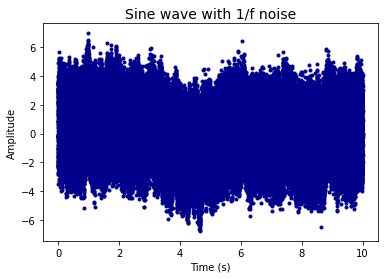

In [6]:
sample_rate=10e3
N = int(1e5)
amplitude = 2*np.sqrt(2)
sine_frequency = 1234.0
times = np.arange(N) / sample_rate

x = generate_pink_noise(sample_rate, N, A=1)
x += amplitude*np.sin(2*np.pi*sine_frequency*np.arange(N)/sample_rate)


plt.plot(times, x, '.', color = 'darkblue')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
_=plt.title('Sine wave with 1/f noise', fontsize = 14)

We calculate the PSD using the Welch method. This method divides the data into segments, calculates the PSD for each segment and averages the results. The number of segments is a trade-off between noise reduction (more sections) and a higher sampling rate in frequency space (less sections).

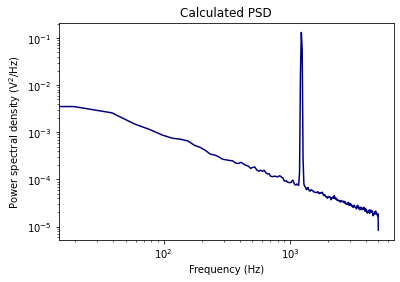

In [7]:
f_welch, P_welch = calculate_psd_welch(x, sample_rate = sample_rate, nperseg = 512)
plot_psd(f_welch, P_welch, fig=2, label='PSD')
_=plt.title('Calculated PSD')

We fit the following model to the PSD:
$$S(f)=A / f^\alpha$$
To make the fitting robust against outliers and to reduce the effect of the sine component we add outlier detection.

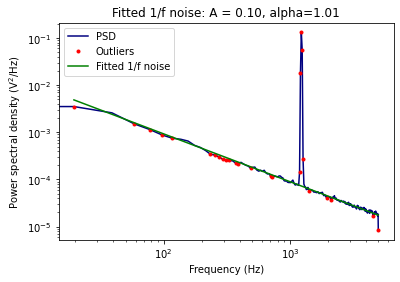

In [9]:
_,results=fit_pink_noise(x_data=f_welch, y_data=P_welch, remove_outliers=True)
inliers=results['inliers']

noise_fit=pink_noise_model(f_welch[1:], **results['fitted_parameter_dictionary'])
A=results['fitted_parameter_dictionary']['A']
alpha=results['fitted_parameter_dictionary']['alpha']

plot_psd(f_welch, P_welch, fig=2, label='PSD')
plt.plot(f_welch[1:][inliers==False], P_welch[1:][inliers==False], '.r', label='Outliers')
plt.plot(f_welch[1:], noise_fit, '-g', label='Fitted 1/f noise')
plt.title(f'Fitted 1/f noise: A = {A:.2f}, alpha={alpha:.2f}')
_=plt.legend()